In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 3-1: The Graphs of Odds, Logit and Sigmoid

## Odds and Logit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

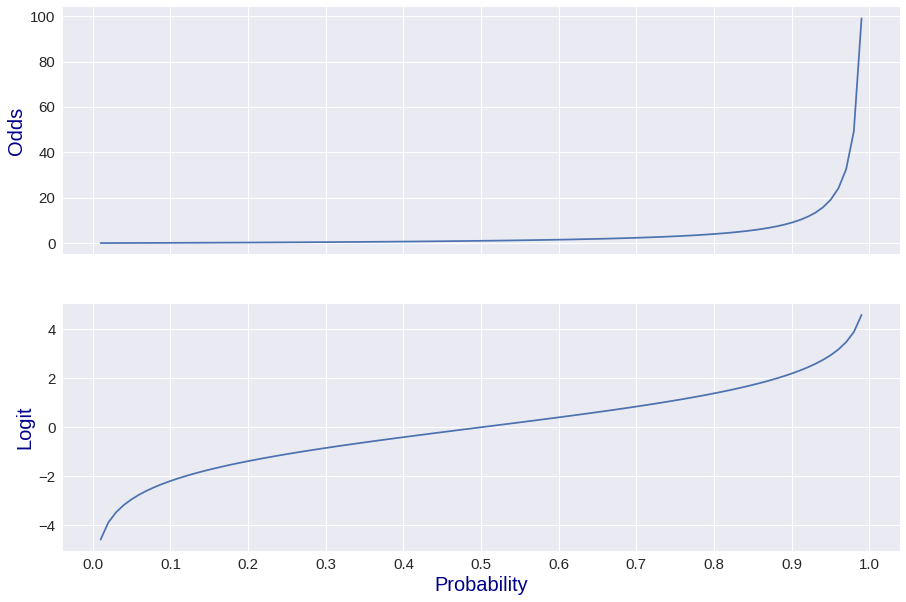

In [7]:
p_np = np.linspace(0.01, 0.99, 100)
p_tf = tf.linspace(0.01, 0.99, 100)

odds_np = p_np / (1-p_np)
odds_tf = p_tf / (1-p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_np)

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')

axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probability', fontsize=20, color='darkblue')
plt.show()

## Sigmoid

In [8]:
from tensorflow.keras.layers import Activation

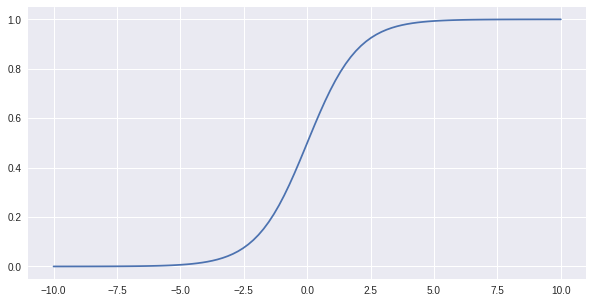

In [9]:
X = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(X)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X.numpy(), sigmoid.numpy())
plt.show()

# 3-2: Logistic Regression Models

## Single-variate Logistic Regression Models

In [10]:
from tensorflow.keras.layers import Dense

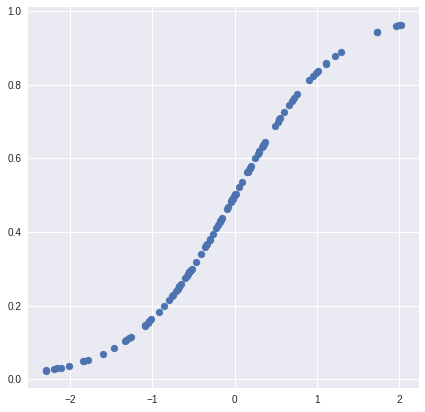

In [20]:
X = tf.random.normal(shape=(100, 1))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X.numpy(), Y.numpy())
plt.show()

In [22]:
print(Y.shape)

(100, 1)


## Multi-variate Logistic Regression Models

In [21]:
X = tf.random.normal(shape=(100, 5))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)

(100, 1)


# 3-3: Binary Classifier with Dense Layers

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# 3-4: Softmax Layers

## IO of Softmax

In [32]:
logit = tf.random.uniform(shape=(2, 5), minval=-10, maxval=10)

softmax_value = Activation('softmax')(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print('Logits:\n', logit.numpy())
print('Probabilities:\n', softmax_value.numpy())
print('Sum of softmax values:\n', softmax_sum)

Logits:
 [[ 7.8307934  -0.15385628 -0.90675354 -5.70642    -7.279532  ]
 [ 6.2471924   2.1722746  -1.8356991  -4.532869   -3.7795305 ]]
Probabilities:
 [[9.9949753e-01 3.4048065e-04 1.6036638e-04 1.3202151e-06 2.7381108e-07]
 [9.8292899e-01 1.6703514e-02 3.0350580e-04 2.0455065e-05 4.3448192e-05]]
Sum of softmax values:
 tf.Tensor([1.        0.9999999], shape=(2,), dtype=float32)


## Softmax in Dense Layers

In [34]:
logit = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
dense = Dense(8, activation='softmax')

Y = dense(logit)
print(tf.reduce_sum(Y, axis=1))

tf.Tensor(
[1.         0.9999999  0.9999999  1.         1.         0.99999994
 1.0000001  1.        ], shape=(8,), dtype=float32)


# 3-5: Multi-class Classifiers

In [35]:
from tensorflow.keras.models import Model

In [41]:
class TestModel(Model):
  def __init__(self):
      super(TestModel, self).__init__()

      self.dense1 = Dense(8, activation='relu')
      self.dense2 = Dense(5, activation='relu')
      self.dense3 = Dense(3, activation='softmax')

  def call(self, x):
    print(f'X: {x.shape}\n {x.numpy()}\n')

    x = self.dense1(x)
    print(f'A1: {x.shape}\n {x.numpy()}\n')

    x = self.dense2(x)
    print(f'A2: {x.shape}\n {x.numpy()}\n')
    
    x = self.dense3(x)
    print(f'Y: {x.shape}\n {x.numpy()}\n')
    print(f'Sum of vectors: {tf.reduce_sum(x, axis=1)}\n')

    return x

In [42]:
model = TestModel()

X = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
Y = model(X)

X: (8, 5)
 [[ 7.5555573   1.863656   -8.841297    7.9385834  -4.9260163 ]
 [ 8.378393   -0.2883196  -5.1440573   0.6864433  -4.575217  ]
 [-8.501372   -4.834733   -0.5201893   5.6680183  -6.925659  ]
 [-1.10709     3.0175667  -4.639969   -3.2145047  -5.5734253 ]
 [-5.4885626   7.570587    5.0439816  -7.9763627   2.719801  ]
 [ 3.4348345  -7.492566   -1.2085962   1.9380617   5.4375696 ]
 [ 4.4002075   7.7220383  -3.2673597   4.8679447  -4.566834  ]
 [ 9.105074    7.038044   -5.0088096  -0.74534225  2.100418  ]]

A1: (8, 8)
 [[ 0.          7.051516    0.          0.          0.          0.
   0.          0.        ]
 [ 0.          7.954995    0.          0.          3.4226394   0.
   0.          0.46125793]
 [ 2.447001    2.157505    5.965233    0.          0.         10.225398
   2.5941713   0.        ]
 [ 2.6597552   2.2327058   2.139456    0.328763    0.          2.051311
   0.          0.        ]
 [ 4.423336    0.          0.04576468  9.133017    0.          0.
   6.27657     0.    